In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from general_graph_utils_main import *

In [4]:
G, G_ud = random_graph_n(4)

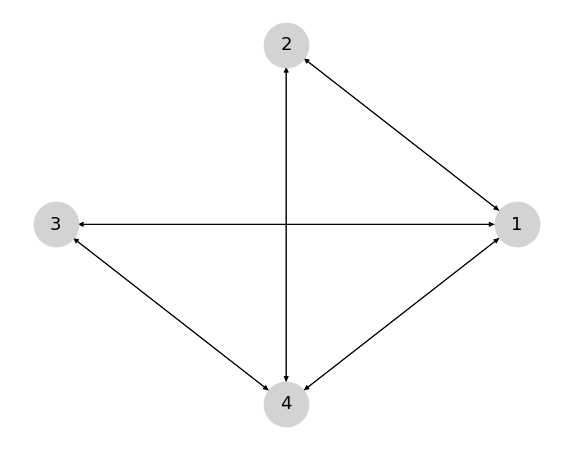

In [5]:
fig, ax = plt.subplots(figsize = (10, 8))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [14]:
# long workflow

node_list = get_nodes(G)
num_nodes = len(node_list)
edge_list = get_edges(G)
cycle_list = get_cycles(G_ud)
num_cycles = len(cycle_list)
label_dict, label_list = get_labels(G)

cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,
                                                                                                             label_dict)

shared_cycle_edges_list,all_cycle_edges_forward = shared_edges_cycles(cycle_list,
                                                                      cycle_edges_forward,
                                                                      cycle_edges_backward)

products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)

cycle_labels_forward, edge_tracker, index_tracker = equilibrium_params(cycle_list,
                                                                       cycle_edges_forward,
                                                                       cycle_labels_forward,
                                                                       cycle_labels_backward,
                                                                       shared_cycle_edges_list)

Cycle 0 affinity after solve: 0.0
Cycle 1 affinity after solve: 0.0


[ 4.58178017 -5.66046088]


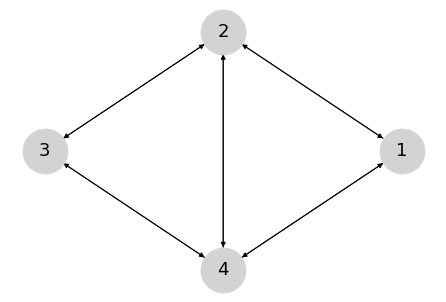

In [64]:
# cleaner workflow to test

# create the graphs
G, G_ud = random_graph_n(4)
nx.draw(G, 
        pos=nx.circular_layout(G), 
        with_labels=True, 
        node_size=2000, 
        node_color = 'lightgray', 
        font_size=18, 
        font_color='black', 
        font_family='sans-serif')

edge_list = get_edges(G)        # list of (u,v) tuples
node_list = get_nodes(G)
# label the graph
label_dict,label_list = get_labels_ones(G)

# get cycles
cycles = get_cycles(G_ud)
edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, get_labels(G)[0])

# compute affinities (if you want)
prodf = calculate_cycle_products(labelsf, labelsb)[0]
prodb = calculate_cycle_products(labelsf, labelsb)[1]
affs = calculate_affinities(prodf,prodb,cycles)
print(affs)

# which edges are shared between cycles?
#shared_edges, all_edges_f = shared_edges_cycles(cycles,
#                                            edgesf,
#                                            edgesb)

# set each cycle to thermodynamic equilibrium, output affinities
#new_labelsf, edge_tracker, idx_tracker = equilibrium_params(cycles, edgesf, labelsf, labelsb, shared_edges)

# update graph's data structures 

# Update label_dict & build label_list in edge_list order:
new_label_dict, new_label_list = reformat_labels(edge_tracker,
                                         idx_tracker,
                                         new_labelsf,
                                         label_dict,
                                         edge_list)

# Then build the Laplacian with the new labels:
L = Laplacian_all(edge_list, label_list, node_list)

In [65]:
L

array([[-2.,  1.,  0.,  1.],
       [ 1., -3.,  1.,  1.],
       [ 0.,  1., -2.,  1.],
       [ 1.,  1.,  1., -3.]])

In [66]:
print(edge_list)

[(1, 2), (1, 4), (2, 4), (2, 3), (2, 1), (3, 4), (3, 2), (4, 2), (4, 3), (4, 1)]


In [67]:
print(cycles)

[[2, 4, 1], [2, 3, 4]]


In [68]:
print(edgesf[0][-1])

(1, 2)


Cycle 0 affinity after solve: 0.0
Cycle 1 affinity after solve: 0.0
[[-3.  1.  1.  1.]
 [ 1. -2.  0.  1.]
 [ 1.  0. -2.  1.]
 [ 1.  1.  1. -3.]]


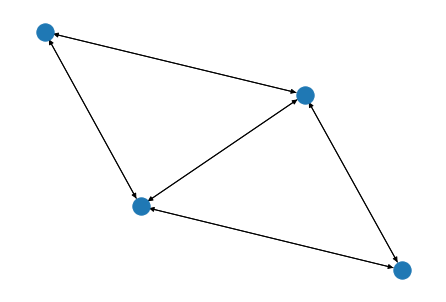

In [21]:
# Minimial complete workflow for debugging

# 1) Generate a reversible graph of size n
G, G_ud = random_graph_n(n=4)
nx.draw(G)

# 2) Extract nodes, edges, and initial labels
node_list      = get_nodes(G)                # e.g. [1,2,3,4]
edge_list      = get_edges(G)        # list of (u,v) tuples
label_dict, _  = get_labels_ones(G)               # dict {(u,v): rate,…}
label_list     = np.array([ label_dict[e]     # aligned with edge_list
                          for e in edge_list ])

# 3) Get cycle structure and directed labels
cycle_list     = get_cycles(G_ud)
cef, ceb, clf, clb = get_cycle_labels_edges(cycle_list, label_dict)
shared_edges, _ = shared_edges_cycles(cycle_list, cef, ceb)

# 4) Zero out affinities
clf_new, edge_tracker, index_tracker = equilibrium_params(
    cycle_list, cef, clf, clb, shared_edges
)

# 5) Push new rates back into label_dict & rebuild label_list
label_dict, label_list = reformat_labels(
    edge_tracker,
    index_tracker,
    clf_new,
    label_dict,
    edge_list
)

# 6) Build the generator (Laplacian) with updated rates
L = Laplacian_all(edge_list, label_list, node_list)
print(L)